# Ploynomial Regression

- Datasets to be used
    
    1. EconomiesOfScale.csv
    2. Employee_Salary.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### using Economiesof Scale.csv

In [9]:
data= pd.read_csv("./DataSets/EconomiesOfScale.csv")
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [10]:
data.rename(mapper={"Number of Units": "units", "Manufacturing Cost": "cost"}, axis=1, inplace=True)
data.tail()

,units,cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   units   1000 non-null   float64
 1   cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [12]:
data.isnull().sum() # Checking null value

units    0
cost     0
dtype: int64

In [13]:
data.describe()

,units,cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


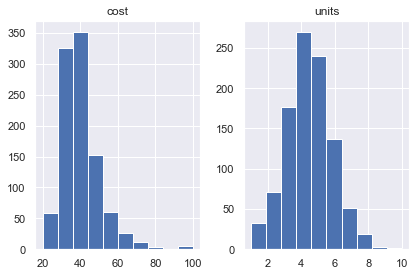

In [14]:
data.hist()
plt.tight_layout()

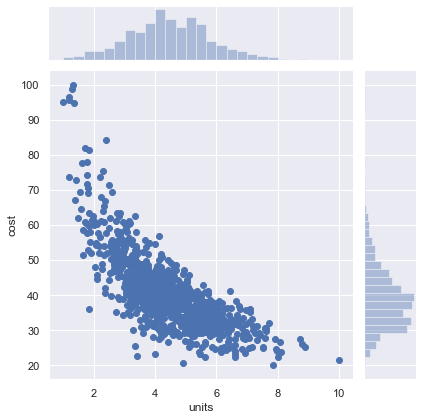

In [15]:
sns.jointplot(x="units", y="cost", data=data) # Polynomial Relationship

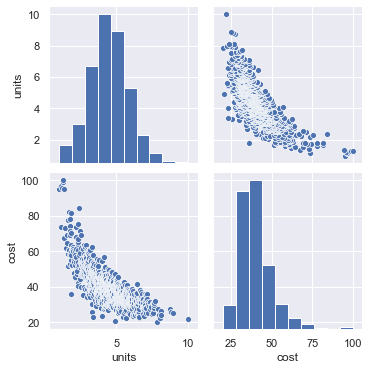

In [16]:
sns.pairplot(data)

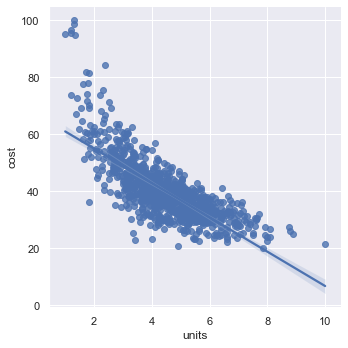

In [17]:
sns.lmplot(x="units", y="cost", data=data)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
model1= PolynomialFeatures(degree=5, include_bias=False)
model2= LinearRegression(fit_intercept=True)

# pipeline= Pipeline([("Polynomial", model1), ("LinearRegression", model2)]) 
pipeline= make_pipeline(model1, model2)

In [72]:
pipeline.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                      order='C')),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                    order='C'),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'polynomialfeatures__degree': 5,
 'polynomialfeatures__include_bias': False,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

In [73]:
# Splitting the dataset for training and testing

x= data.iloc[:,[0]]
y= data.iloc[:,1]


x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=42)

In [74]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [75]:
pipeline.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                    order='C'),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}

In [76]:
lr= pipeline.named_steps['linearregression']
lr.coef_, lr.intercept_

(array([-9.02776963e+01,  2.97263951e+01, -5.21872353e+00,  4.57914584e-01,
        -1.56902650e-02]),
 159.03083033760356)

In [77]:
preds= pipeline.predict(x_test)

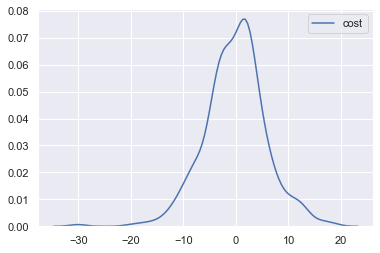

In [78]:
sns.kdeplot(y_test-preds)

In [79]:
r2= r2_score(y_test, preds)
mse= mean_squared_error(y_test, preds)

r2, mse

(0.696930492198558, 34.864918894918084)

In [80]:
# Converting ND to 1d
# https://stackoverflow.com/a/13730506/12210002

# Numpy Reshape
# https://stackoverflow.com/a/42510505/12210002

# Flatten vs ravel vs flat
# https://stackoverflow.com/a/28930580/12210002
# https://stackoverflow.com/a/30523509/12210002

x_test.to_numpy().reshape((-1,)), preds

(array([4.51868904, 5.28468976, 5.29269585, 5.03059573, 4.18228903,
        5.07762345, 4.92529196, 4.4838088 , 5.85309245, 3.04985592,
        5.57765595, 2.60114991, 4.955669  , 7.16964363, 6.59142023,
        6.11358697, 3.71413713, 6.01132131, 5.3765682 , 3.87397592,
        4.60021704, 3.21071126, 4.06285262, 4.53349366, 3.37158582,
        3.4889104 , 2.78438034, 7.60433574, 6.12838874, 6.69209119,
        3.9788377 , 3.0560049 , 4.90800734, 4.43451552, 4.05841319,
        3.32766635, 5.10000757, 4.72120536, 6.12483872, 2.36375571,
        3.91165268, 2.76205194, 3.84631627, 7.18242972, 3.77662768,
        3.69719175, 6.38762569, 4.79741011, 4.24996542, 5.68471755,
        4.66085565, 5.98434739, 3.64227038, 4.69746897, 1.81591741,
        1.87414418, 4.87760465, 1.54089845, 3.41034927, 5.62045553,
        3.76241368, 2.33203947, 4.57973193, 3.36875554, 4.81127551,
        5.11086907, 5.03414295, 5.90155589, 2.56510541, 4.58311586,
        2.8408349 , 4.42905235, 4.73566281, 5.30

In [81]:
# We have to sort the data as the resulted graph will be a zigzagged
# https://stackoverflow.com/a/62984584/12210002

pred_df= pd.DataFrame({"X": x_test.to_numpy().reshape((-1,)), "y": preds})
pred_df.head()

,X,y
0,4.518689,37.911226
1,5.284690,34.390198
2,5.292696,34.356712
3,5.030596,35.489347
4,4.182289,39.673556


In [82]:
# Sorting
pred_df.sort_values(by='X', axis=0, inplace=True)
pred_df.head()

,X,y
334,1.000000,93.703030
225,1.191499,85.724303
240,1.204771,85.212883
259,1.307435,81.427201
374,1.339386,80.308492


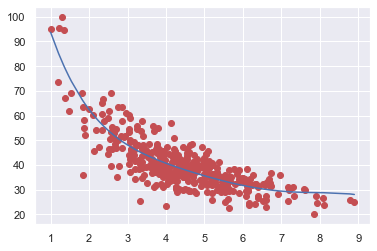

In [83]:
plt.scatter(x_test,y_test,c="r")
plt.plot(pred_df['X'], pred_df["y"], c='b')

### using EmployeeSalary.csv

In [84]:
data= pd.read_csv("./DataSets/Employee_Salary.csv")
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [87]:
data.rename( mapper={"Years of Experience": "yoe", "Salary": "salary"}, axis="columns", inplace=True)
data.head()

,yoe,salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yoe     2000 non-null   float64
 1   salary  2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [89]:
data.describe()

,yoe,salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D2779C3C8>,
      dtype=object)

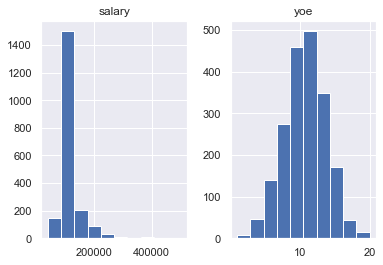

In [90]:
data.hist()

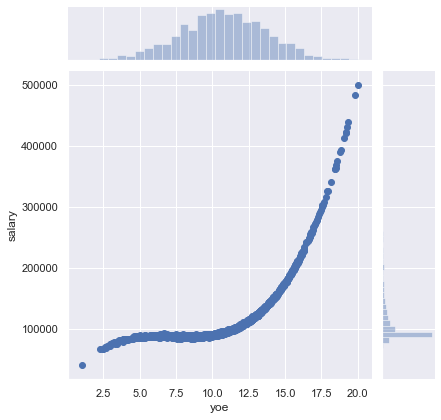

In [91]:
sns.jointplot(x="yoe", y="salary", data=data)

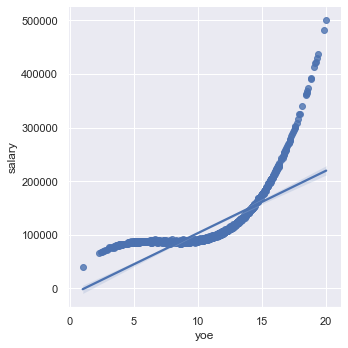

In [92]:
sns.lmplot(x="yoe", y="salary", data=data)

In [93]:
model1= PolynomialFeatures(degree=3, include_bias=False)
model2= LinearRegression(fit_intercept=True)

# pipeline= Pipeline([("Polynomial", model1), ("LinearRegression", model2)]) 
pipeline= make_pipeline(model1, model2)

In [94]:
x= data.loc[:,["yoe"]]
y= data.loc[:,"salary"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=42)

In [95]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [96]:
preds= pipeline.predict(x_test)

In [97]:
r2= r2_score(y_test, preds)
mse= mean_squared_error(y_test, preds)

r2, mse

(0.9991857481644344, 1728195.4332391894)

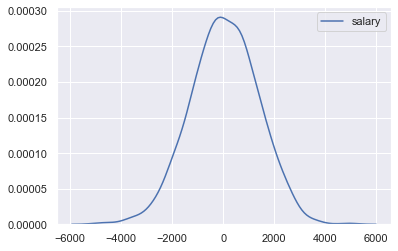

In [98]:
sns.kdeplot(y_test-preds)

In [99]:
pred_df= pd.DataFrame({"X": x_test.to_numpy().reshape((-1,)), "y": preds})
pred_df.sort_values(by='X', axis=0, inplace=True)
pred_df.head()

,X,y
452,2.450875,67276.568732
669,2.761983,71304.832328
532,3.519210,78914.715961
717,3.649798,79941.083043
209,3.834124,81259.419993


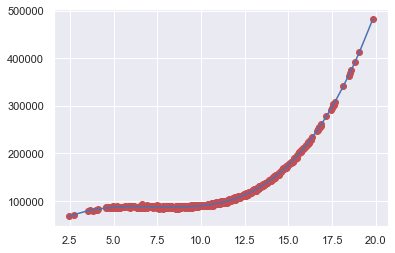

In [100]:
plt.scatter(x_test,y_test,c="r")
plt.plot(pred_df['X'], pred_df["y"], c='b')

In [101]:
# Prediciton

inputs= [[10]]

pipeline.predict(inputs)

array([89531.90276759])